In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('oasis_longitudinal.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
df = df.iloc[:,3:]
df.head()

,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [4]:
df.isnull().sum()

Visit        0
MR Delay     0
M/F          0
Hand         0
Age          0
EDUC         0
SES         19
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64

In [5]:
df["SES"].fillna("0",inplace=True)
df["MMSE"].fillna("0",inplace=True)
df["M/F"].replace(['M','F'],[0,1],inplace = True)
df.drop("Hand",axis = 1,inplace=True)

In [6]:
df.duplicated().sum()

0

In [7]:
print(df.shape)
df1 = df.copy()

(373, 11)


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()
df_sc = sc.fit_transform(df)
print(df_sc.shape)

(373, 11)


In [10]:
from sklearn.decomposition import PCA


In [11]:
pca = PCA()
pcomps = pca.fit_transform(df_sc)
print(pcomps.shape)

(373, 11)


In [12]:
eig_val = pca.explained_variance_
eig_vec = pca.components_
print('Eigen Values\n',eig_val)
print('Eigen Vectors\n',eig_vec)

Eigen Values
 [2.86139381 2.01741928 1.92998493 1.3445331  1.20620865 0.5212081
 0.40792941 0.3297994  0.32687526 0.07366513 0.01055281]
Eigen Vectors
 [[ 2.36229791e-01  2.28308442e-01 -3.96674457e-01  1.38203997e-01
   2.18260078e-01 -2.17163418e-01 -5.49686059e-02  1.05996007e-01
   5.15365983e-01 -2.79755209e-01 -5.12543252e-01]
 [ 1.36174806e-01  8.74812462e-02 -4.67710340e-02  1.81853742e-01
  -3.70616868e-01  2.10701915e-01 -5.41152251e-01  5.23543307e-01
  -1.57077258e-01 -3.76272131e-01  1.53608744e-01]
 [ 5.86371073e-01  6.11794132e-01  2.23542822e-01  2.62642932e-01
  -2.09379765e-02  6.31536208e-02  2.03137093e-01 -2.51518503e-01
  -1.65715787e-01  3.10987492e-03  1.62787576e-01]
 [-1.07553909e-01 -1.18223952e-01  2.64193573e-01  3.44167282e-01
   4.71354114e-01 -5.93232650e-01 -6.35080388e-02  9.88339126e-02
  -2.14701551e-01 -3.19482156e-01  2.23917833e-01]
 [ 2.71307445e-01  2.19042291e-01  1.05465355e-02 -6.18177279e-01
   2.46539993e-01 -3.05580436e-01 -3.27282007e-01 

In [13]:
tot = sum(eig_val)
print(tot)
var_eig_val = [(i/tot)*100 for i in eig_val]
print(var_eig_val)
cum_eig_var = np.cumsum(np.array(var_eig_val))
print(cum_eig_var)

11.029569892473111
[25.94293196983507, 18.29100587590697, 17.498279162540907, 12.190258679528275, 10.936134983585308, 4.72555238090418, 3.698506956680762, 2.9901383537825716, 2.9636265696836364, 0.6678876177257953, 0.09567744982653761]
[ 25.94293197  44.23393785  61.73221701  73.92247569  84.85861067
  89.58416305  93.28267001  96.27280836  99.23643493  99.90432255
 100.        ]


In [14]:
pcomps_df = pd.DataFrame(pcomps,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11'])
pcomps_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,3.008455,-0.735435,-1.717498,-0.477850,-2.236389,0.970540,0.326509,-0.359569,0.680511,-0.020270,0.384098
1,3.596791,-0.760334,-0.485902,-0.583093,-2.263828,0.777608,0.342040,-0.327972,0.053144,0.286281,0.439650
2,1.374102,0.163391,-2.262634,0.108521,0.409988,0.562981,1.859348,-0.404133,0.342723,-0.218933,-0.019670
3,2.267282,-0.095975,-0.909883,-0.076973,0.141826,0.388248,1.849205,-0.332318,-0.695371,0.008268,0.075677
4,3.039415,1.292740,0.924188,0.020445,0.956945,0.461077,1.667168,-0.694109,0.157720,-0.806584,0.011811


In [15]:
pcomps_df = pcomps_df.iloc[:,:4]
pcomps_df.head()

,PCA1,PCA2,PCA3,PCA4
0,3.008455,-0.735435,-1.717498,-0.477850
1,3.596791,-0.760334,-0.485902,-0.583093
2,1.374102,0.163391,-2.262634,0.108521
3,2.267282,-0.095975,-0.909883,-0.076973
4,3.039415,1.292740,0.924188,0.020445


In [16]:
x = pcomps_df.iloc[:,:4]

In [17]:
from sklearn.cluster import KMeans

C:\Users\mehul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Wcss
 [3033.0391774708933, 2268.7963621579293, 1855.9164045587468, 1538.6460802232496, 1351.8948694566552, 1236.729565825763, 1144.650675586358, 1066.8359352404568, 1019.1668824482382, 969.810619721557, 923.6329653583277, 892.4667595749612, 851.4788978336462, 817.83067496869, 772.8175227141489, 748.7913437672972, 725.2270424465303, 698.20094186528]


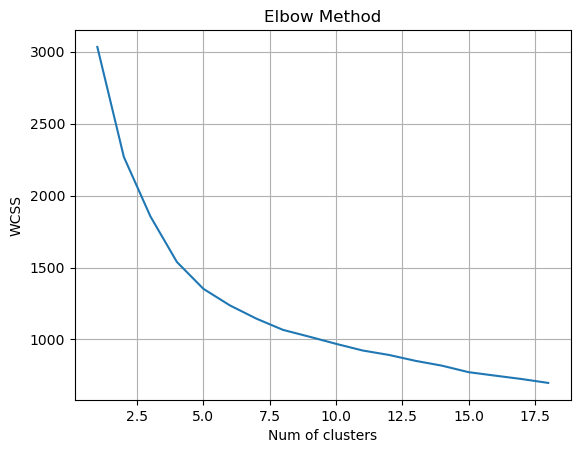

In [24]:
wcss = []
for i in range(1,19):
    m = KMeans(n_clusters=i)
    m.fit(x)
    wcss.append(m.inertia_)

print('Wcss\n',wcss)
plt.plot(list(range(1,19)),wcss)
plt.title('Elbow Method')
plt.xlabel('Num of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [25]:
k2 = KMeans(n_clusters=5)
k2.fit(x)

KMeans(n_clusters=5)

In [26]:
ypred_k2 = k2.predict(x)
print(ypred_k2)

[4 4 4 4 3 2 2 4 4 3 2 2 3 2 2 1 1 1 1 2 2 3 1 2 2 4 0 0 0 4 4 3 3 2 2 3 4
 4 3 4 4 1 1 0 0 0 0 1 1 1 3 4 4 1 1 1 1 2 2 3 0 0 2 2 3 3 1 2 1 1 3 3 0 0
 3 3 2 2 0 0 0 2 2 2 1 4 1 1 0 0 0 2 2 2 0 2 2 4 4 4 0 0 1 1 1 0 0 2 2 3 4
 3 1 2 2 2 1 1 1 2 1 1 3 2 0 0 1 1 4 4 3 4 4 3 2 2 0 0 0 4 4 1 1 3 3 2 2 2
 2 4 4 3 3 3 0 0 1 1 3 3 3 1 0 2 2 3 4 4 4 4 3 1 0 0 4 4 3 0 0 1 1 1 1 2 0
 0 0 0 0 4 4 3 1 1 2 2 1 1 4 4 4 2 2 4 4 1 1 2 2 1 1 3 2 2 3 4 4 3 2 2 3 4
 0 4 4 0 0 4 4 4 4 0 0 2 0 0 2 2 2 1 1 4 4 4 3 1 1 2 2 3 0 0 1 1 2 2 1 1 1
 1 2 4 4 4 3 3 2 2 2 2 3 1 1 1 3 1 1 4 4 4 4 2 2 2 2 2 2 3 1 2 1 1 4 4 3 4
 4 1 2 0 0 1 2 2 3 2 2 1 0 2 2 2 2 2 2 2 0 0 2 2 1 2 4 4 4 4 4 0 0 4 4 0 0
 2 2 4 4 3 4 4 1 1 1 4 4 4 2 2 3 1 1 2 2 3 4 4 2 0 0 4 4 1 1 1 3 2 0 4 4 3
 1 1 1]


In [27]:
df1.shape

(373, 12)

In [28]:
df1['Cluster5'] = ypred_k2
df1.tail(10)

,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Cluster5
363,3,732,1,68,13,2.0,30.0,0.0,1506,0.740,1.165,1
364,4,2107,1,72,13,2.0,30.0,0.0,1510,0.723,1.162,3
365,1,0,1,72,16,3.0,24.0,0.5,1354,0.733,1.296,2
366,2,553,1,73,16,3.0,21.0,1.0,1351,0.708,1.299,0
367,1,0,0,80,16,1.0,28.0,0.5,1704,0.711,1.030,4
368,2,842,0,82,16,1.0,28.0,0.5,1693,0.694,1.037,4
369,3,2297,0,86,16,1.0,26.0,0.5,1688,0.675,1.040,3
370,1,0,1,61,13,2.0,30.0,0.0,1319,0.801,1.331,1
371,2,763,1,63,13,2.0,30.0,0.0,1327,0.796,1.323,1
372,3,1608,1,65,13,2.0,30.0,0.0,1333,0.801,1.317,1
